In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import re

Accuracy: 98.55


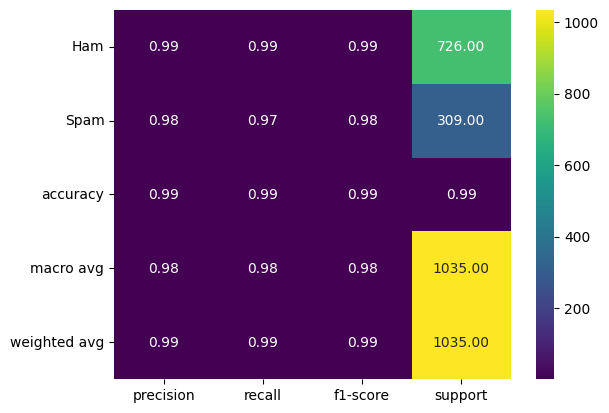

Predictions:
Spam | Win a free vacation! Click to claim your prize!


In [4]:
df = pd.read_csv('spam_ham_dataset.csv').iloc[:, 2:].rename(columns={ 'label_num': 'spam' })

def clean_text(text: str) -> str:
  return ' '.join(re.sub(r'[^a-zA-Z\s]', '', text).lower().split())

df['text'] = df['text'].apply(clean_text)

X = df['text']
y = df['spam']

vect = TfidfVectorizer(max_features=len(df), stop_words='english')
X_tfidf = vect.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=727)

model = LogisticRegression(random_state=727)
model.fit(X_train.toarray(), y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred, output_dict=True, target_names=['Ham', 'Spam'])

print(f'Accuracy: {accuracy*100:.2f}')
sns.heatmap(pd.DataFrame(classification).T, annot=True, cmap='viridis', fmt='.2f')
plt.show()

new_emails = [
  "Win a free vacation! Click to claim your prize!",
]

print('Predictions:')
for email in new_emails:
  email_tfidf = vect.transform([clean_text(email)])
  prediction = model.predict(email_tfidf)
  print('Spam' if prediction[0] == 1 else 'Not Spam', email, sep=" | ")